# Grad-CAM热力图-可解释性分析

同济子豪兄 2023-10-7

## 安装grad-cam工具包

In [2]:
!pip install grad-cam

## `tools/analysis_tools/visualization_cam.py`命令行参数说明

- 需可视化的图像

- 模型 config 配置文件

- 模型 checkpoint 权重文件

--target-layers 需要可视化的模型层

--category-index 需要可视化的类别 ID 号，在西瓜数据集中，4代表黑籽

--device 推理设备

## 获得Grad-CAM热力图（PSPNet）

In [4]:
!python mmsegmentation/tools/analysis_tools/visualization_cam.py \
        mmsegmentation/Watermelon87_Semantic_Seg_Mask/img_dir/val/01bd15599c606aa801201794e1fa30.jpg \
        mmsegmentation/Zihao-Configs/ZihaoDataset_PSPNet_20230818.py \
        mmsegmentation/checkpoint/Zihao_PSPNet.pth \
        --target-layers backbone.layer4 \
        --category-index 4 \
        --device cuda:0

## 获得Grad-CAM热力图（KNet）

In [1]:
!python mmsegmentation/tools/analysis_tools/visualization_cam.py \
        mmsegmentation/Watermelon87_Semantic_Seg_Mask/img_dir/val/01bd15599c606aa801201794e1fa30.jpg \
        mmsegmentation/Zihao-Configs/ZihaoDataset_KNet_20230818.py \
        mmsegmentation/checkpoint/Zihao_KNet.pth \
        --target-layers backbone.stages[3].blocks[1].ffn.layers[0][0] \
        --category-index 4 \
        --device cuda:0

## 获得Grad-CAM热力图（Fast-SCNN）

In [4]:
!python mmsegmentation/tools/analysis_tools/visualization_cam.py \
        mmsegmentation/Watermelon87_Semantic_Seg_Mask/img_dir/val/01bd15599c606aa801201794e1fa30.jpg \
        mmsegmentation/Zihao-Configs/ZihaoDataset_FastSCNN_20230818.py \
        mmsegmentation/checkpoint/Zihao_FastSCNN.pth \
        --target-layers backbone.feature_fusion.conv_higher_res \
        --category-index 4 \
        --device cuda:0

## 运行完成后，在本地生成`prediction.png`预测结果文件和`vis_cam.png`热力图文件

## 思考题

- 更换不同的模型、不同的类别、不同的层，分别可视化热力图，看看有什么不同的效果

- 模型浅层和深层，热力图有什么不同？为什么？

- 语义分割的Grad-CAM热力图，和图像分类的Grad-CAM热力图，有什么异同？

- 有了语义分割预测结果，为什么还要绘制Grad-CAM热力图

- 简述CAM和Grad-CAM算法原理

## 扩展阅读

同济子豪兄-可解释机器学习公开课

人工智能可解释性、显著性分析领域的导论、算法综述、经典论文精读、代码实战、前沿讲座。

课程主页：https://github.com/TommyZihao/zihao_course/tree/main/XAI

## 查看热力图

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

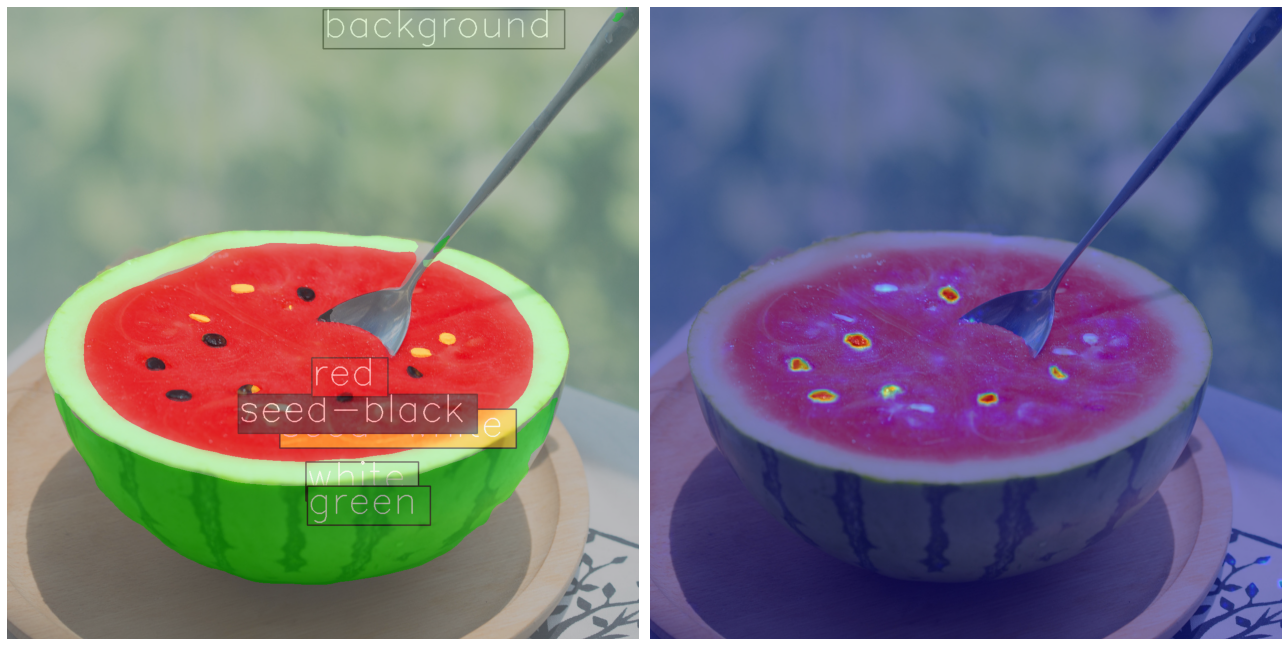

In [14]:
plt.figure(figsize=(18, 12))

plt.subplot(1,2,1)
plt.imshow(cv2.imread('prediction.png')[:,:,::-1])
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.imread('vis_cam.png')[:,:,::-1])
plt.axis('off')
plt.savefig('mmsegmentation/outputs/K4_gradcam.jpg')

plt.tight_layout()
plt.show()